In [7]:
import numpy as np
import tensorflow as tf
import keras
import tensorflow.keras.layers as layers
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Template for Keras tasks of sheet 5

In [8]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
img_rows, img_cols = 28, 28

# Normalize it
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# Store it in the correct format for Keras
# The image data has a single channel (grayscale values)
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
# Store the labels in the correct format for Keras
Y_train = keras.utils.np_utils.to_categorical(y_train, 10)
Y_test = keras.utils.np_utils.to_categorical(y_test, 10)

To use `X_train` for fully-connected inputs, reshape it. Use the `input_shape` variable in the first layer of your networks.

In [9]:
def plot_history(history):
    """Create a plot showing the training history of `model.fit`.
    
    Example:
        history = model.fit(...)
        plot_history(history)
    """
    x = range(history.params['epochs'])
    acc, val_acc = history.history['acc'], history.history.get('val_acc')
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].set_title('accuracy')
    axarr[0].plot(x, acc, label='train')
    if val_acc:
        axarr[0].plot(x, val_acc, label='validation')
    axarr[0].legend()
    
    loss, val_loss = history.history['loss'], history.history.get('val_loss')
    axarr[1].set_title('loss')
    axarr[1].plot(x, loss, label='train')
    if val_loss:
        axarr[1].plot(x, val_loss, label='validation')
    axarr[1].legend()

# Task 4.1-4.3

In [10]:
def conplot(NN, value=0, maxx=2, minx=-2, maxy=2, miny=-2):
 
    #create meshgrid using the given min and max x,y values
    t = np.arange(minx-1, maxx+1, 0.1)
    s = np.arange(miny-1, maxy+1, 0.1)
    p,q = np.meshgrid(t, s)
    
    funcArgs = np.array([p.flatten(), q.flatten()]).T
    r = NN.ff(funcArgs)
    r= np.reshape(r, p.shape)
    
    plt.contourf(t,s,r,[-99999,value,99999], colors=['blue','red'],alpha=0.2)

def conplotKeras(model, value=0, maxx=2, minx=-2, maxy=2, miny=-2):
 
    #create meshgrid using the given min and max x,y values
    t = np.arange(minx-1, maxx+1, 0.1)
    s = np.arange(miny-1, maxy+1, 0.1)
    p,q = np.meshgrid(t, s)
    
    funcArgs = np.array([p.flatten(), q.flatten()]).T
    r = model.predict(funcArgs)
    r= np.reshape(r, p.shape)
    
    plt.contourf(t,s,r,[-99999,value,99999], colors=['blue','red'],alpha=0.2)

In [11]:
class id:
    def __init__(self):
        print('hi')

    def eval(x):
        return x
    def der(x):
        return np.ones(x.shape)

class relu:
    def __init__(self):
        print('hi')
    
    def eval(x):
        return np.maximum(x,0)
    
    def der(x):
        x[np.maximum(x,0)==0]=0
        x[np.maximum(x,0) != 0]=1
        return x

    

class TwoLayerNN:
    def __init__(self,Data_X,Data_Y, nu =0.1, K = 10 , d_2 = 20, phi_2 = relu, phi_3 = id):
        #Data,learning rate , Batch size , Steps, numer of neurons, first activation function, second activation function
        self.Data_X = Data_X
        self.Data_Y = Data_Y
        self.nu= nu
        self.K = K
        self.Steps = Steps
        self.d_1 = Data_X.shape[1]
        self.d_2 = d_2
        self.phi_2 = phi_2
        self.phi_3 = phi_3
        self.weights_1 = np.random.uniform(-1,1, (self.d_1,self.d_2))
        self.weights_2 = np.random.uniform(-1,1, (self.d_2,1))
        self.bias_1 = np.random.uniform(-1,1, (self.d_2,1))
        self.bias_2 = np.random.uniform(-1,1)
        
    def ff(self,x):
        o_1 = x.reshape(x.shape[0],1,x.shape[1])
        net_2= o_1 @ self.weights_1
        net_2 += self.bias_1.reshape((1,1,self.d_2))
        o_2 = self.phi_2.eval(net_2)
        net_3 = o_2 @ self.weights_2 + self.bias_2
        o_3 = self.phi_3.eval(net_3)
        return o_3
        
    def backprop(self,x,y):
        o_1 = x.reshape(x.shape[0],1,x.shape[1])
        net_2= o_1 @ self.weights_1
        net_2 += self.bias_1.reshape((1,1,self.d_2))
        o_2 = self.phi_2.eval(net_2)
        net_3 = o_2 @ self.weights_2 + self.bias_2
        o_3 = self.phi_3.eval(net_3)
        
        delta_2 = 2*(o_3 - y.reshape(y.shape[0],1,1))
        delta_1 = (delta_2* self.phi_3.der(net_3)) @ self.weights_2.T
        delta_0 = (delta_1 * self.phi_2.der(net_2)) @ self.weights_1.T
        grad_W1= o_1 * (delta_1 * self.phi_2.der(net_2)).reshape(self.K,self.d_2,1)
        grad_W2= o_2 * (delta_2 * self.phi_3.der(net_3))
        
        grad_b1= delta_1 * self.phi_2.der(net_2)
        grad_b2= delta_2 * self.phi_3.der(net_3)
        
        self.weights_1 = self.weights_1 - (1/self.K)*self.nu*np.sum(grad_W1,axis=0).T
        self.weights_2 =self.weights_2 - (1/self.K)*self.nu*np.sum(grad_W2,axis=0).T
        self.bias_1 = self.bias_1 - (1/self.K)*self.nu*np.sum(grad_b1,axis=0).T
        self.bias_2 =self.bias_2 - (1/self.K)*self.nu*np.sum(grad_b2,axis=0).T
        
    def StocGradDesc(self):
        Batch_X,Batch_Y = self.DrawBatch()
        self.backprop(Batch_X,Batch_Y)
        
        
    def DrawBatch(self):
        C = np.random.randint(0,self.Data_X.shape[0],(self.K))
        return self.Data_X[C],self.Data_Y[C]
    
    def LSE(self):
        return (1/self.Data_X.shape[0])*np.sum((self.ff(self.Data_X)-self.Data_Y.reshape((self.Data_Y.shape[0],1,1)))**2)

In [12]:
# create data, take a uniform distribution on [0,1]x[0,2\pi], scale 1st coord by sqrt( to get uniform dist on disk) and map to circle using polar coords

n= 250 #number of samples
x= np.random.uniform(0,1,n)
x=x**0.5
y= np.random.uniform(0,2*np.pi,n)
yd=x*np.sin(y)
xd=x*np.cos(y)
X1= np.vstack((xd,yd)).T
X1lbl=-1*np.ones(n)

#similarly for annulus
x= np.random.uniform(1,4,n)
x=x**0.5
y= np.random.uniform(0,2*np.pi,n)
yd=x*np.sin(y)
xd=x*np.cos(y)
X2= np.vstack((xd,yd)).T
X2lbl=np.ones(n)
#label X1 by -1 and X2 by 1


X_Data = np.concatenate((X1,X2))
Y_Data = np.concatenate((X1lbl,X2lbl))

In [13]:
Steps = 30*5000
NN= TwoLayerNN(X_Data,Y_Data,nu=0.01)
for i in range(Steps):
    NN.StocGradDesc()
    if i % 5000 == 0:
        print(f"Least squares error after {i} itterations: {NN.LSE()}")
        
print(f"final Least squares error: {NN.LSE()}")

Least squares error after 0 itterations: 4.249135405291288
Least squares error after 5000 itterations: 0.22355535460948955
Least squares error after 10000 itterations: 0.20769059700798354
Least squares error after 15000 itterations: 0.1948396659939644
Least squares error after 20000 itterations: 0.19056790592604786
Least squares error after 25000 itterations: 0.16898435464693357
Least squares error after 30000 itterations: 0.1619411246596141
Least squares error after 35000 itterations: 0.17518333864253652
Least squares error after 40000 itterations: 0.1568058483588574
Least squares error after 45000 itterations: 0.1621632842082383
Least squares error after 50000 itterations: 0.14920659360125496
Least squares error after 55000 itterations: 0.1564912831186276
Least squares error after 60000 itterations: 0.14574864084613678
Least squares error after 65000 itterations: 0.16599234897033607
Least squares error after 70000 itterations: 0.1715895639280844
Least squares error after 75000 ittera

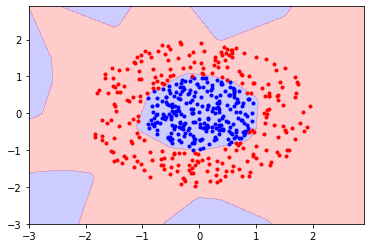

In [14]:
conplot(NN)
plt.plot(X_Data[Y_Data==-1][:,0],X_Data[Y_Data==-1][:,1],'bo',markersize=3)
plt.plot(X_Data[Y_Data==1][:,0],X_Data[Y_Data==1][:,1],'ro',markersize=3)
plt.show()

nu = 1 -- Error
S(* 5000): 5      10     20     30
nu: 0.1    0.19   0.21   0.19   0.20
nu: 0.01   0.15   0.15   0.12   0.10
nu: 0.001  0.23   0.20   0.19   0.17

Based on some testing it seems nu = 0.01 and S = 30* 5000 is optimal. Running upto 100* 5000 doesn't help.

In [15]:
model = tf.keras.models.Sequential()

model.add(layers.Dense(20, activation = 'relu')  )
model.add(layers.Dense(1, activation = 'linear')  )

model.compile(loss='mean_squared_error', optimizer ='adam', metrics =['accuracy'])

model.fit(X_Data, Y_Data, batch_size = 20, epochs=50)

W0608 23:21:21.975554  1488 deprecation.py:506] From C:\Users\janwu\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/50
500/500 [==============================] - 0s 508us/sample - loss: 0.9259 - acc: 0.2620
Epoch 2/50
500/500 [==============================] - 0s 100us/sample - loss: 0.8545 - acc: 0.1720
Epoch 3/50
500/500 [==============================] - 0s 96us/sample - loss: 0.8094 - acc: 0.1420
Epoch 4/50
500/500 [==============================] - 0s 134us/sample - loss: 0.7680 - acc: 0.1560
Epoch 5/50
500/500 [==============================] - 0s 130us/sample - loss: 0.7294 - acc: 0.1440
Epoch 6/50
500/500 [==============================] - ETA: 0s - loss: 0.6903 - acc: 0.1529    - 0s 154us/sample - loss: 0.6910 - acc: 0.1600
Epoch 7/50
500/500 [==============================] - 0s 144us/sample - loss: 0.6518 - acc: 0.1580
Epoch 8/50
500/500 [==============================] - 0s 110us/sample - loss: 0.6116 - acc: 0.1840
Epoch 9/50
500/500 [==============================] - 0s 122us/sample - loss: 0.5757 - acc: 0.1880
Epoch 10/50
500/500 [==============================] - 0s 110us/samp

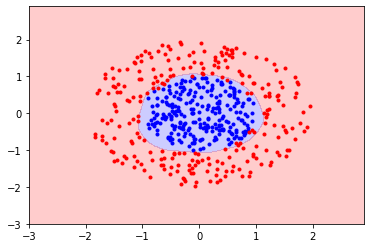

In [16]:
conplotKeras(model)
plt.plot(X_Data[Y_Data==-1][:,0],X_Data[Y_Data==-1][:,1],'bo',markersize=3)
plt.plot(X_Data[Y_Data==1][:,0],X_Data[Y_Data==1][:,1],'ro',markersize=3)
plt.show()